#**Electric Vehicle Data Analysis Project**

Project Overview

In this project, you will analyze a dataset related to electric vehicles (EVs). The dataset contains various features such as electric range, energy consumption, price, and other relevant attributes. Your goal is to conduct a thorough analysis to uncover meaningful insights, tell a compelling story, conduct hypothesis testing and provide actionable recommendations based on
the data.


Video Explanation Link: https://drive.google.com/file/d/1Je3040_rmvQ0ylWnSZjRSqwqH72PQFfn/view?usp=sharing

###Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Load, Inspect & Cleaning Data

Before starting any analysis, it's essential to load the dataset and understand its structure. Using df.info(), df.head(), and df.isnull().sum() allows us to quickly see the data types, the number of rows, and where missing values exist. This step ensures we know exactly what data we are working with and whether cleaning is required.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Python Project/FEV-data-Excel.xlsx')
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


df.head() - Visual confirmation of column names & sample values.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


df.info() - Identifies data types and non-null counts.

In [ ]:
df.isnull().sum()

,0
Car full name,0
Make,0
Model,0
Minimal price (gross) [PLN],0
Engine power [KM],0
Maximum torque [Nm],0
Type of brakes,1
Drive type,0
Battery capacity [kWh],0
Range (WLTP) [km],0


df.isnull().sum() - Shows which columns require cleaning.

In [ ]:
df['Type of brakes'] = df['Type of brakes'].fillna(df['Type of brakes'].mode()[0])
print("Cloumn Type of brakes contain nullvalues is: ",df['Type of brakes'].isnull().sum())

Cloumn Type of brakes contain nullvalues is:  0


For categorical columns like "Type of brakes", filling with the mode makes sense because categories must remain consistent and mean/median do not apply.

In [ ]:
df[["Boot capacity (VDA) [l]","Acceleration 0-100 kph [s]","Permissable gross weight [kg]","Maximum load capacity [kg]","mean - Energy consumption [kWh/100 km]"]].describe()

,Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Permissable gross weight [kg],Maximum load capacity [kg],mean - Energy consumption [kWh/100 km]
count,52.000000,50.00000,45.000000,45.000000,44.000000
mean,445.096154,7.36000,2288.844444,520.466667,18.994318
std,180.178480,2.78663,557.796026,140.682848,4.418253
min,171.000000,2.50000,1310.000000,290.000000,13.100000
25%,315.000000,4.87500,1916.000000,440.000000,15.600000
50%,425.000000,7.70000,2119.000000,486.000000,17.050000
75%,558.000000,9.37500,2870.000000,575.000000,23.500000
max,870.000000,13.10000,3500.000000,1056.000000,28.200000


In [ ]:
num_cols = [
    'Boot capacity (VDA) [l]',
    'Acceleration 0-100 kph [s]',
    'Permissable gross weight [kg]',
    'Maximum load capacity [kg]',
    'mean - Energy consumption [kWh/100 km]'
]
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())

for col in num_cols:
  print(f"Cloumn {col} contain nullvalues is: {df[col].isnull().sum()}")

Cloumn Boot capacity (VDA) [l] contain nullvalues is: 0
Cloumn Acceleration 0-100 kph [s] contain nullvalues is: 0
Cloumn Permissable gross weight [kg] contain nullvalues is: 0
Cloumn Maximum load capacity [kg] contain nullvalues is: 0
Cloumn mean - Energy consumption [kWh/100 km] contain nullvalues is: 0


For numeric columns (e.g, Boot Capacity, Energy Consumption), filling missing values with the mean is reasonable because these features are continuous and the dataset is not extremely large.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          53 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


##Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
1. Your task is to filter out EVs that meet these criteria.

In [ ]:
df_filtered = df[
    (df['Minimal price (gross) [PLN]'] <= 350000) &
    (df['Range (WLTP) [km]'] >= 400)
]
df_filtered.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


We used a conditional filter because we needed to select EVs that satisfy two numerical constraints simultaneously:

- Price less than or equal to 350,000 PLN
- Range greater than or equal to 400 km

Using Pandas boolean filtering is the most efficient way to retrieve rows matching these criteria.

2. Group them by the manufacturer (Make).

In [ ]:
grouped = df_filtered.groupby('Make')["Model"].count()
grouped

,Model
Make,
Audi,1
BMW,1
Hyundai,1
Kia,2
Mercedes-Benz,1
Tesla,3
Volkswagen,3


Grouping by "Make" allows us to understand which brands produce EVs that meet customer requirements. This is important for market insights, helping us see which manufacturers offer long-range EVs at a reasonable price.

3. Calculate the average battery capacity for each manufacturer.

In [ ]:
avg_battery = df_filtered.groupby("Make")['Battery capacity [kWh]'].mean().round(2)
avg_battery

,Battery capacity [kWh]
Make,
Audi,95.00
BMW,80.00
Hyundai,64.00
Kia,64.00
Mercedes-Benz,80.00
Tesla,68.00
Volkswagen,70.67


Average battery capacity by manufacturer helps identify:

- Which brands offer powerful battery systems
- Whether higher-range vehicles from each brand rely on larger batteries

##Task 2: You suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean - Energy consumption [kWh/100 km] column.

In [ ]:
Q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
print("Q1 values is:", Q1)
print("Q3 values is:", Q3)
IQR = Q3 - Q1
print("IQR values is:", IQR.round(2))

Q1 values is: 15.9
Q3 values is: 21.85
IQR values is: 5.95


The Interquartile Range (IQR) is a standard, widely accepted statistical technique for detecting outliers.

Logic behind IQR calculation:
- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3 – Q1
- Outliers = values outside Q1 - 1.5*ISR or Q3 + 1.5*IQR
This ensures we detect vehicles that consume far more or far less energy than typical EVs.

In [ ]:
lower_level = Q1 - 1.5 * IQR
upper_level = Q3 + 1.5 * IQR
print("Lower lever is:", lower_level.round(2))
print("Upper lever is:", upper_level.round(2))

Lower lever is: 6.98
Upper lever is: 30.78


In [ ]:
df[(df['mean - Energy consumption [kWh/100 km]'] < lower_level) |
              (df['mean - Energy consumption [kWh/100 km]'] > upper_level)]

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


In dataset, no outliers were detected.
This suggests:
- All EVs fall within a reasonable energy consumption range.
- The dataset is clean and consistent.
- There are no extreme or unusual models in terms of consumption efficiency.

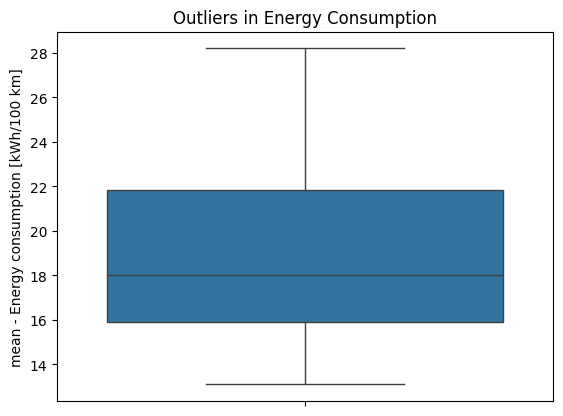

In [ ]:
sns.boxplot(df['mean - Energy consumption [kWh/100 km]'])
plt.title('Outliers in Energy Consumption')
plt.show()

##Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
1. Create a suitable plot to visualize

In [ ]:
import plotly.express as px
fig = px.scatter(df, x = df['Battery capacity [kWh]'], y = df['Range (WLTP) [km]'], title="Battery Capacity vs Range",
                 trendline="ols",  trendline_color_override="red" )
fig.show()

A scatter plot is the most suitable way to visualize the relationship between two continuous numeric variables.

Here, we want to observe how battery capacity influences driving range.

In [ ]:
correlation = df[['Battery capacity [kWh]', 'Range (WLTP) [km]']].corr()
correlation

,Battery capacity [kWh],Range (WLTP) [km]
Battery capacity [kWh],1.000000,0.810439
Range (WLTP) [km],0.810439,1.000000


After visual inspection, calculating the Pearson correlation coefficient quantifies the strength and direction of the relationship:
- A correlation of 0.81 indicates a strong positive relationship.
- This means EVs with higher battery capacity generally achieve higher range.

2. Highlight any insights
- Scatter Plot Confirms the Trend
    - The scatter plot visually shows an upward-sloping pattern.
    - As battery capacity increases, range tends to increase as well.
-  Strong Positive Correlation
    - The correlation coefficient between Battery Capacity (kWh) and Range (WLTP) is 0.81.
    - A value above 0.8 indicates a strong positive linear relationship.
    - This suggests that EVs with larger battery packs generally achieve longer driving ranges.



##Task 4: Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria.

In [ ]:
class ev_recommender:
  def __init__(self, dataframe):
    self.df = dataframe

  def recommend(self):
    print("Please enter your preferences for an EV:")
    budget = int(input("Enter your budget in PLN (e.g. 350000): "))
    desired_range = int(input("Enter your desired minimum range in km (e.g. 400): "))
    battery_capacity = int(input("Enter your desired minimum battery capacity in kWh (e.g. 60): "))

    filtered_evs = self.df[
        (self.df['Minimal price (gross) [PLN]'] <= budget) &
        (self.df['Range (WLTP) [km]'] >= desired_range) &
        (self.df['Battery capacity [kWh]'] >= battery_capacity)
    ]
    return filtered_evs.sort_values(by='Range (WLTP) [km]', ascending=False).head(3)

Using an object-oriented approach allows you to package the recommendation logic in a clean, reusable structure.

The recommend() method filters EVs based on three user-provided preferences:
- Budget
- Minimum range
- Minimum battery capacity

These are the most common decision factors for EV buyers.

In [22]:
recommender = ev_recommender(df)
recommender.recommend()

Please enter your preferences for an EV:
Enter your budget in PLN (e.g. 350000): 455000
Enter your desired minimum range in km (e.g. 400): 400
Enter your desired minimum battery capacity in kWh (e.g. 60): 55


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
42,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100.0,652,...,2288.844444,520.466667,5,5,19,250,745.0,3.8,150,18.994318
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,2288.844444,520.466667,5,5,21,261,745.0,2.5,150,18.994318
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,2288.844444,520.466667,5,5,18,233,425.0,4.4,150,18.994318


Customers usually want a shortlist rather than a long list.

Sorting by range ensures the best-performing EVs appear first.

##Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
###Recommendations and Conclusion: Provide actionable insights based on your analysis.

In [ ]:
tesla = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi = df[df['Make'] == 'Audi']['Engine power [KM]']
tesla.head()

,Engine power [KM]
39,285
40,372
41,480
42,525
43,772


In [23]:
audi.head()

,Engine power [KM]
0,360
1,313
2,503
3,313
4,360


1. Null Hypothesis (H₀):

There is no significant difference in the average Engine power [KM] between Tesla and Audi electric vehicles.

---

2. Alternative Hypothesis (H₁):

There is a significant difference in the average Engine power [KM] between Tesla and Audi electric vehicles.

A two-sample t-test (specifically Welch’s t-test, because equal_var=False) is used to compare the means of two independent groups — here:
- Tesla engine power
- Audi engine power

This statistical test tells us whether the difference in mean power is significant or simply due to random variation.

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(tesla, audi, equal_var=False)
print(f"T-statistic: {t_stat.round(2)}, P-value: {p_value.round(2)}")

T-statistic: 1.79, P-value: 0.11




- Hypothesis Test Conclusion

  The independent two-sample t-test was used to compare the average Engine power (KM) of Tesla and Audi EVs.

  - T-statistic: 1.79
  - P-value: 0.11

  Since the p-value (0.11) is greater than the significance level of 0.05, we fail to reject the null hypothesis.
  This means there is no statistically significant difference in the average engine power between Tesla and Audi vehicles in this dataset.

  Although Tesla shows slightly higher mean engine power (as suggested by the positive t-statistic), the difference is not strong enough to be considered statistically meaningful.


- Recommendations

  Since engine power is similar between the two brands, customers should compare Tesla and Audi based on other factors like range, charging speed, price, and features. Both brands offer competitive performance, so the final choice should depend on the buyer’s preferences rather than engine power alone.